In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
from os import getcwd
from os import listdir
from os.path import isfile, join, isdir
from skimage import measure
from PIL import Image

import skimage
from skimage import io

In [2]:
###function outlines fish. 
###i should be the address of the image 
###show is a boolean value indicating whether or not you want the plot printed
###sens is the sensitivity
def fishskin(i, show, sens):
    img = Image.open(i)
    img_gray = img.convert('L')
    contours = measure.find_contours(img_gray, sens)
    contours_long = list()
    for x in range (0, len(contours)):
        if len(contours[x]) > 99:
            contours_long.append(contours[x])
    if show:
        fig, ax = plt.subplots()
        ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

        for n, contour in enumerate(contours_long):
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
        ax.axis('image')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
    return(contours_long)

def get_fish_images(fish):

  
    paths = dict.fromkeys(fish)

    for idx,g in enumerate(fish):
        fileNames = [f for f in listdir(join(trainPath,g)) if isfile(join(trainPath,g, f))]
        for i,f in enumerate(fileNames):
            fileNames[i] = join(trainPath,g,f)     
        paths[g] = fileNames
        
    return paths


def read_image(src):
    """Read and resize individual images"""
    im = io.imread(src)
    return im


 # Fish classes

In [3]:

trainPath = '../train'
groupNames = [f for f in listdir(trainPath) if isdir(join(trainPath, f))]

groupData = pd.DataFrame ({'group': groupNames})
groupData

,group
0,ALB
1,BET
2,DOL
3,LAG
4,NoF
5,OTHER
6,SHARK
7,YFT


# Build y train arrays

In [4]:
fish_classes = groupData['group'];
fish_paths = get_fish_images(fish_classes)

for idx,fish in enumerate(fish_classes):
    groupData.ix[idx,'num files'] = int(len(fish_paths[fish]))
    

files = []
y_all_1 = []
y_all_2 = []



for fish in fish_classes:
    fish_files = fish_paths[fish]
    files.extend(fish_files)
    
    y_fish = np.tile(fish, len(fish_files))
    y_all_1.extend(y_fish)
#     print("{0} photos of {1}".format(len(fish_files), fish))

    if (fish == 'NoF'):
        y_all_2.extend(y_fish)
    else:
        y_fish = np.tile('FISH', len(fish_files))
        y_all_2.extend(y_fish)

    
y_all_1 = np.array(y_all_1) # All fish classes

y_all_2 = np.array(y_all_2) #Fish / no fish

groupData

,group,num files
0,ALB,1719.0
1,BET,200.0
2,DOL,117.0
3,LAG,67.0
4,NoF,465.0
5,OTHER,299.0
6,SHARK,176.0
7,YFT,734.0


# Summary: Image sizes

In [5]:
image_sizes =[]
for i, im in enumerate(files): 
    img = read_image(im)
    image_sizes.append(str(img.shape[0]) + '-' + str(img.shape[1]))
    if i%1000 == 0: print('Processed {} of {}'.format(i, len(files)))

image_sizes = np.array(image_sizes)

Processed 0 of 3777
Processed 1000 of 3777
Processed 2000 of 3777
Processed 3000 of 3777


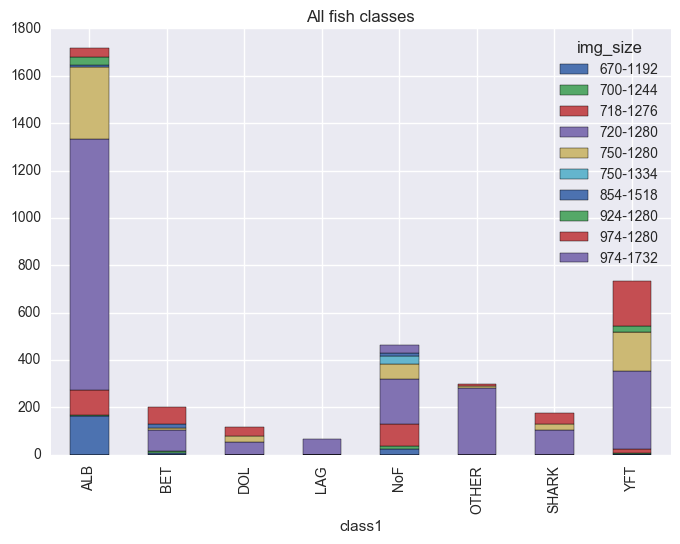

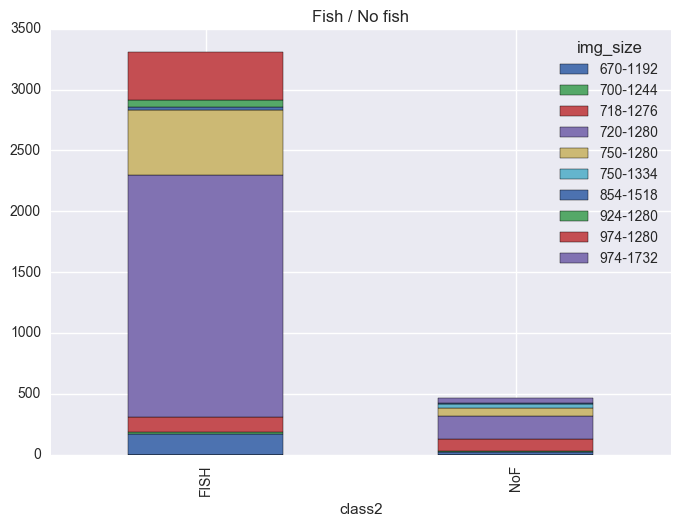

In [11]:
# image_sizes = pd.DataFrame({'img_size':image_sizes})
# image_sizes.value_counts().plot(kind='bar')
# plt.show()

imgT = pd.DataFrame({ 'class1':y_all_1,
                             'class2':y_all_2,
                             'img_size':image_sizes
                            });

# imgT.img_size.value_counts().plot(kind='bar')

df =imgT.groupby(['img_size','class1'])['class1'].count().unstack('img_size').fillna(0)
df.plot(kind='bar', stacked=True)
plt.title('All fish classes')
plt.show()


df =imgT.groupby(['img_size','class2'])['class2'].count().unstack('img_size').fillna(0)
df.plot(kind='bar', stacked=True)
plt.title('Fish / No fish')
plt.show()


# Resize images

In [13]:
from skimage.transform import resize

ROWS = 90  #720
COLS = 160 #1280
CHANNELS = 3
X_all = np.ndarray((len(files), ROWS, COLS, CHANNELS), dtype=np.uint8)

for i, f in enumerate(files): 
    im = io.imread(f)
    im = resize(im, (ROWS, COLS))
    X_all[i] = im
    if i%1000 == 0: print('Processed {} of {}'.format(i, len(files)))



Processed 0 of 3777
Processed 1000 of 3777
Processed 2000 of 3777
Processed 3000 of 3777


# Scratch

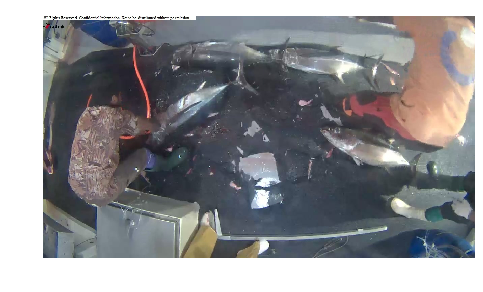

(720, 1280)


In [17]:
camera = io.imread(fish_paths[groupData['group'][0]][0])

plt.figure(figsize=(5, 5))
plt.imshow(camera, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()

print(camera.shape[0:2])

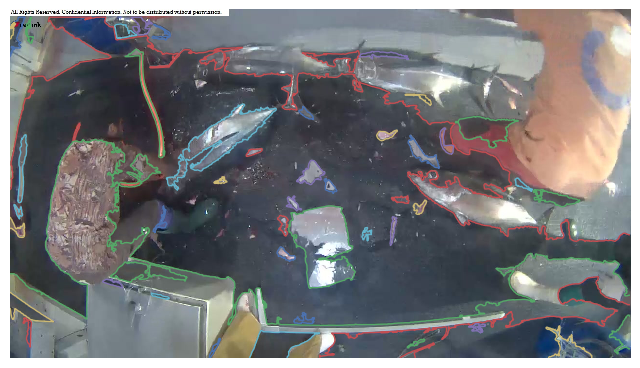

In [19]:
test_cons = fishskin(fish_paths[groupData['group'][0]][0], True, 90)

In [20]:
#num contours
len(test_cons)

51

In [12]:
'''
fishPaths = dict.fromkeys(groupData['group'])


for idx,g in enumerate(groupNames):
    fileNames = [f for f in listdir(join(trainPath,g)) if isfile(join(trainPath,g, f))]
    for i,f in enumerate(fileNames):
        fileNames[i] = join(trainPath,g,f)
        
    groupData.ix[idx,'num files'] = int(len(fileNames))
    fishPaths[g] = fileNames




X_all = np.ndarray((len(files), ROWS, COLS, CHANNELS), dtype=np.uint8)
im = io.imread(f)
im = resize(im, (ROWS, COLS))
X_all[0] = im
'''

"\nfishPaths = dict.fromkeys(groupData['group'])\n\n\nfor idx,g in enumerate(groupNames):\n    fileNames = [f for f in listdir(join(trainPath,g)) if isfile(join(trainPath,g, f))]\n    for i,f in enumerate(fileNames):\n        fileNames[i] = join(trainPath,g,f)\n        \n    groupData.ix[idx,'num files'] = int(len(fileNames))\n    fishPaths[g] = fileNames\n\n\n\n\nX_all = np.ndarray((len(files), ROWS, COLS, CHANNELS), dtype=np.uint8)\nim = io.imread(f)\nim = resize(im, (ROWS, COLS))\nX_all[0] = im\n"